In [57]:
using DataFrames, PythonPlot, Distributions,Random
using SpecialFunctions 
PythonPlot.svg(true)
include("simulations.jl")
include("branching.jl")
include("drawing.jl")
include("single_cell_models.jl")
FIG_PATH= "/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"

"/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"

# Lineage

In [58]:
# fig = figure(figsize=(3,3))
# ax = fig.add_subplot(111, projection="3d")  # Correct way to set 3D projection


# for i in unique(df.cell)[1:10]
#     i  = Int(i)
#     df_i = df[df.cell .== i,:]
#     ax.plot(df_i.x,log.(df_i.length),log.(df_i.length ./ df_i.length[1]))
# end

# ax.set_xlabel(L"x")
# ax.set_ylabel(L"Y")
# ax.set_zlabel(L"log(length/length[0])")
# # rotate the plot
# ax.view_init(10, -30)
# tight_layout()
# fig


# Population


In [93]:
dt = 0.01
τ =0.3
D = 0.01
σY = 0.02
σx = sqrt(D*τ)
α = 0.5
init = [0,1.,1]
num_cells = 50000
function φ(y, y0, σY, α)
    μ = log(2) + α * y0
    A = exp(-((y - μ)^2) / (2 * σY^2))/(2 * π * σY^2)^(1/2)
    B = (1 - erf((y - μ) / (sqrt(2) * σY)))
    return A / B
end

a = 1.
β(gr,y,y0) = gr^a*φ(y,y0,σY,α)
θ_OU = 1,D,β,dt

(1, 0.01, Main.β, 0.01)

In [108]:
Tmax_tree = 2
function terminate(cell)
    cell.label[end,1]>Tmax_tree
end

root = create_cell(generator_OU_rate([-Tmax_tree,1.,1],θ_OU))
grow_tree!(root,terminate,θ_OU,generator_OU_rate)

In [118]:
init = get_leaf_nodes(root)
Tmax = 20
Td = 4
Nmax = 50
grow_dilute!(init,Td,Tmax,Nmax,θ_OU,generator_OU_rate)

66710-element Vector{Cell{Matrix{Float64}}}:
 Cell{Matrix{Float64}}([6.659999999999904 0.8881772522671416 1.0366014308317237; 6.669999999999904 0.8798892950300574 1.0458082889370468; … ; 7.429999999999888 0.9806017378223194 2.0570271886865887; 7.439999999999888 0.9946382737696932 2.077198433046327], nothing, nothing)
 Cell{Matrix{Float64}}([6.659999999999904 0.8881772522671416 1.0366014308317237; 6.669999999999904 0.8972143817225623 1.0458082889370468; … ; 7.419999999999888 0.9120523973359117 2.1384458011416103; 7.429999999999888 0.9292261158992521 2.1579495473366515], nothing, nothing)
 Cell{Matrix{Float64}}([6.549999999999907 1.0609107495263839 1.006401993915738; 6.559999999999906 1.065277572860474 1.017079020852638; … ; 7.239999999999892 1.0721166262011843 2.0549992585118315; 7.249999999999892 1.0702335876022737 2.077031247230648], nothing, nothing)
 Cell{Matrix{Float64}}([6.549999999999907 1.0609107495263839 1.006401993915738; 6.559999999999906 1.05666038638685 1.017079020852638; …

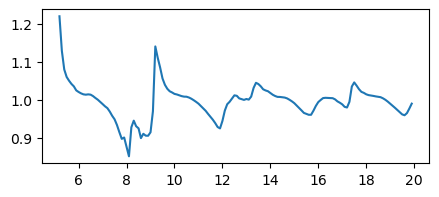

In [120]:
df = make_forest_data_frame(init)
df[!, :time_r] = round.(df.time, digits=1);
df = df[df.time_r .< Tmax,:]

fig,ax = subplots(figsize=(5,2))
df_mean = combine(groupby(df, :time_r),:x => mean => :x,:length => mean => :length,:branch_id => unique => :source)

sort!(df_mean, [:time_r])
ax.plot(df_mean.time_r,df_mean.x,"-")
fig


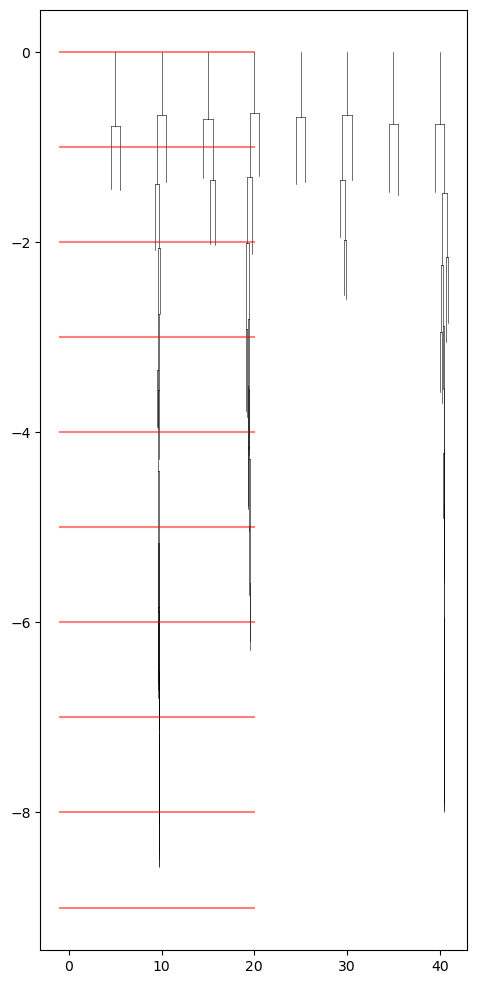

In [34]:
fig,ax = subplots(figsize=(5,10))
tight_layout()
# ax.spines["top"].set_visible(false)
# ax.spines["right"].set_visible(false)
# ax.spines["bottom"].set_visible(false)
# ax.spines["left"].set_visible(false)
for i in eachindex(init)
    recursive_draw_tree(ax,init[i],i*5,0,1,1,0.4)
end
t =0 
while t>-Tmax
    ax.plot([-1,20],[t,t],"r-",alpha=0.5)
    t -= Td
end

#ax.tick_params(left = false, right = false , labelleft = false,labelbottom = false, bottom = false) 
savefig(FIG_PATH*"/tree.pdf",bbox_inches="tight")
fig

In [ ]:
function get_xattime(root,tmax)
    label = root.label
    times =label[:,1]
    if length(label[times .< tmax,2]) == 0
        return 0
    end
    return label[times .< tmax,2][end]
end




get_xattime (generic function with 1 method)

In [ ]:
pop = [cell for cell in get_leaf_nodes(root)]
# turn into dataframe
[DataFrame(cell.label,["time","x","length"]) for cell in pop]





_collect_tree_data! (generic function with 1 method)

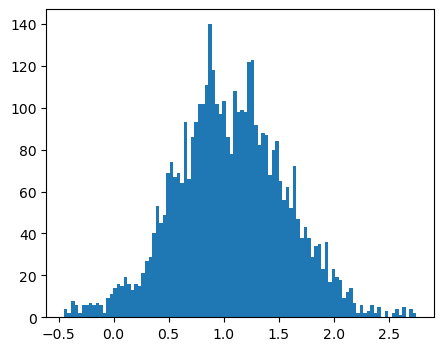

In [245]:
tree_df = make_tree_data_frame(root)

tree_df.cell = tree_df.branch_id;

fig,ax = subplots(figsize=(5,4))
ax.hist(tree_df[tree_df.isleaf .== true,:].x,100)
fig

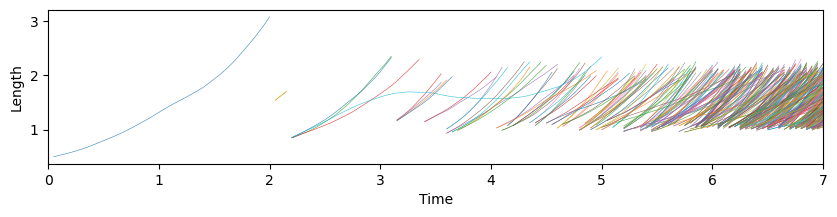

In [ ]:
fig, ax= subplots(figsize=(10,2))
for cell in unique(tree_df.cell)
    df_cell = tree_df[tree_df.cell .== cell,:]
    ax.plot(df_cell.time, df_cell.length,"-",alpha=0.9,lw=0.4)
end
ax.set_xlim(0,7)
ax.set_xlabel("Time")
ax.set_ylabel("Length")
fig

In [223]:
tree_df

MethodError: MethodError: no method matching trunc(::Float64, ::Float64)
The function `trunc` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  trunc(!Matched::Type{T}, ::Any) where T
   @ Base rounding.jl:474
  trunc(::Any; kws...)
   @ Base rounding.jl:469
  trunc(!Matched::Dates.DateTime, !Matched::Type{Dates.Minute})
   @ Dates ~/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Dates/src/adjusters.jl:14
  ...
